<a href="https://colab.research.google.com/github/NAGARAJVODNALA/AIFINALPROJECT/blob/main/AINAGFINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Abstract :**
Pulsar candidates collected during the HTRU survey. Pulsars are a type of star, of considerable scientific interest. Candidates must be classified in to pulsar and non-pulsar classes to aid discovery.

**Attribute Information :**
Each candidate is described by 8 continuous variables, and a single class variable. The first four are simple statistics obtained from the integrated pulse profile (folded profile). This is an array of continuous variables that describe a longitude-resolved version of the signal that has been averaged in both time and frequency. The remaining four variables are similarly obtained from the DM-SNR curve.

**These are summarised below:**

Mean of the integrated profile.
Standard deviation of the integrated profile.
Excess kurtosis of the integrated profile.
Skewness of the integrated profile.
Mean of the DM-SNR curve.
Standard deviation of the DM-SNR curve.
Excess kurtosis of the DM-SNR curve.
Skewness of the DM-SNR curve.
Class

In [1]:
#IMPORT LIBRARIES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import missingno as msno
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense, Dropout


**PHASE 1 --------- A,B,C,D,E,F,G,H,I,J,K**

In [2]:
# PHASE 1
# A) Load the dataset
data = pd.read_csv('HTRU_2_AIDATASET.csv')

In [3]:

# B) Show number of rows and columns
print(f"The dataset HTRU_2_AIDATASET has {data.shape[0]} rows and {data.shape[1]} columns.")


The dataset HTRU_2_AIDATASET has 17898 rows and 9 columns.


In [4]:
# C)-----Check for missing values
missing_values = data.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)



Missing values in each column:
Mean of the integrated profile                  0
Standard deviation of the integrated profile    0
Excess kurtosis of the integrated profile       0
Skewness of the integrated profile              0
Mean of the DM-SNR curve                        0
Standard deviation of the DM-SNR curve          0
Excess kurtosis of the DM-SNR curve             0
Skewness of the DM-SNR curve                    0
Class                                           0
dtype: int64


In [5]:
# D)Shows first five rows of the dataset
data.head()




,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,Class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [6]:
# E)Let's obtain a brief overview of the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Mean of the integrated profile                17898 non-null  float64
 1   Standard deviation of the integrated profile  17898 non-null  float64
 2   Excess kurtosis of the integrated profile     17898 non-null  float64
 3   Skewness of the integrated profile            17898 non-null  float64
 4   Mean of the DM-SNR curve                      17898 non-null  float64
 5   Standard deviation of the DM-SNR curve        17898 non-null  float64
 6   Excess kurtosis of the DM-SNR curve           17898 non-null  float64
 7   Skewness of the DM-SNR curve                  17898 non-null  float64
 8   Class                                         17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


<Axes: >

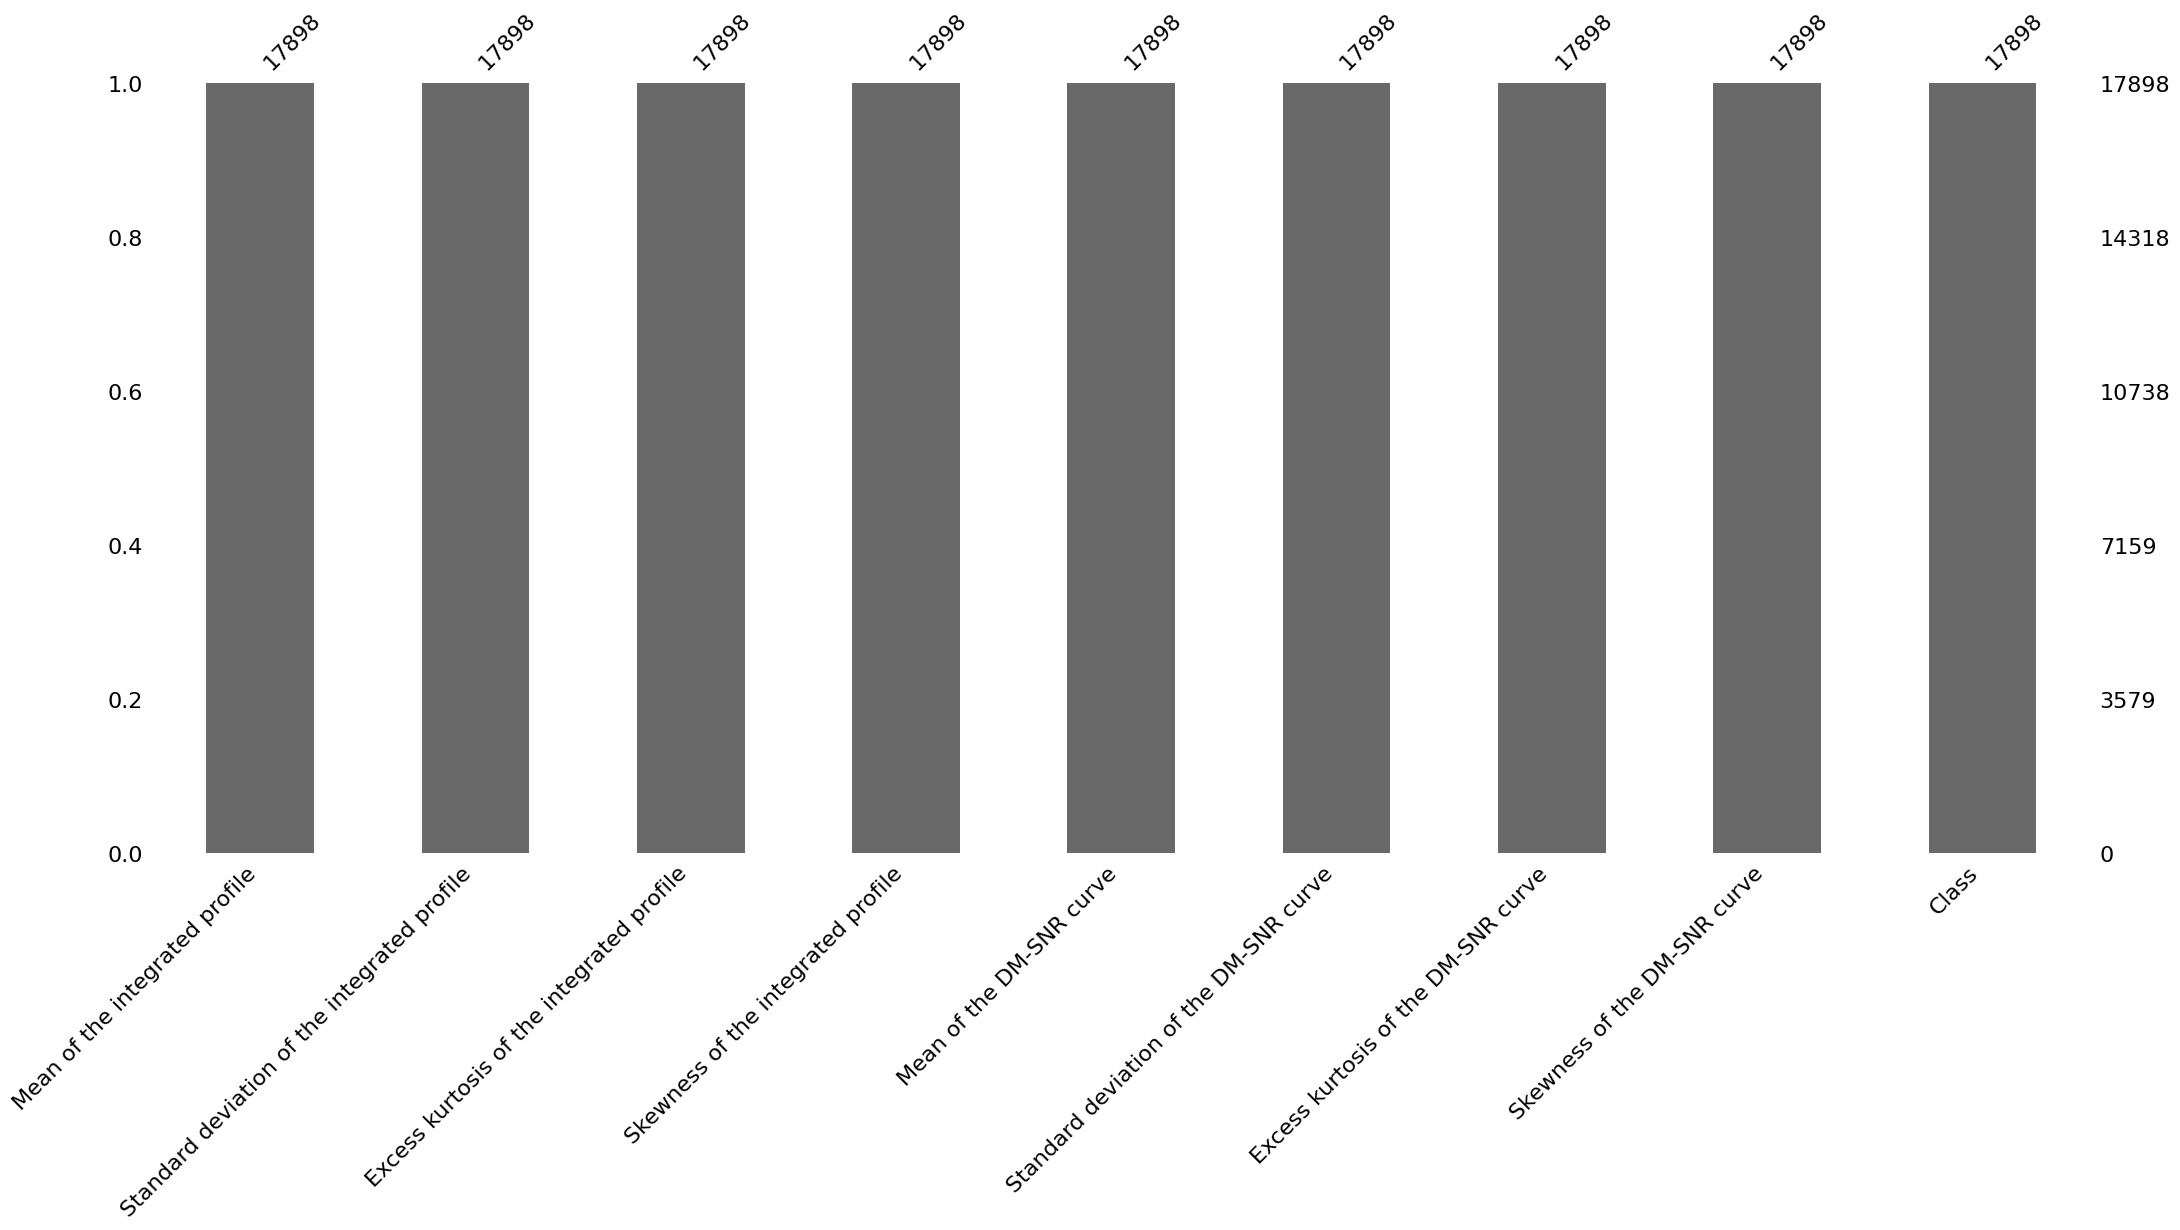

In [7]:
# F)Shows number of rows in each column with bar diagram
msno.bar(data)

In [8]:
# G) Distribute each column , split the input features and output parameters
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values


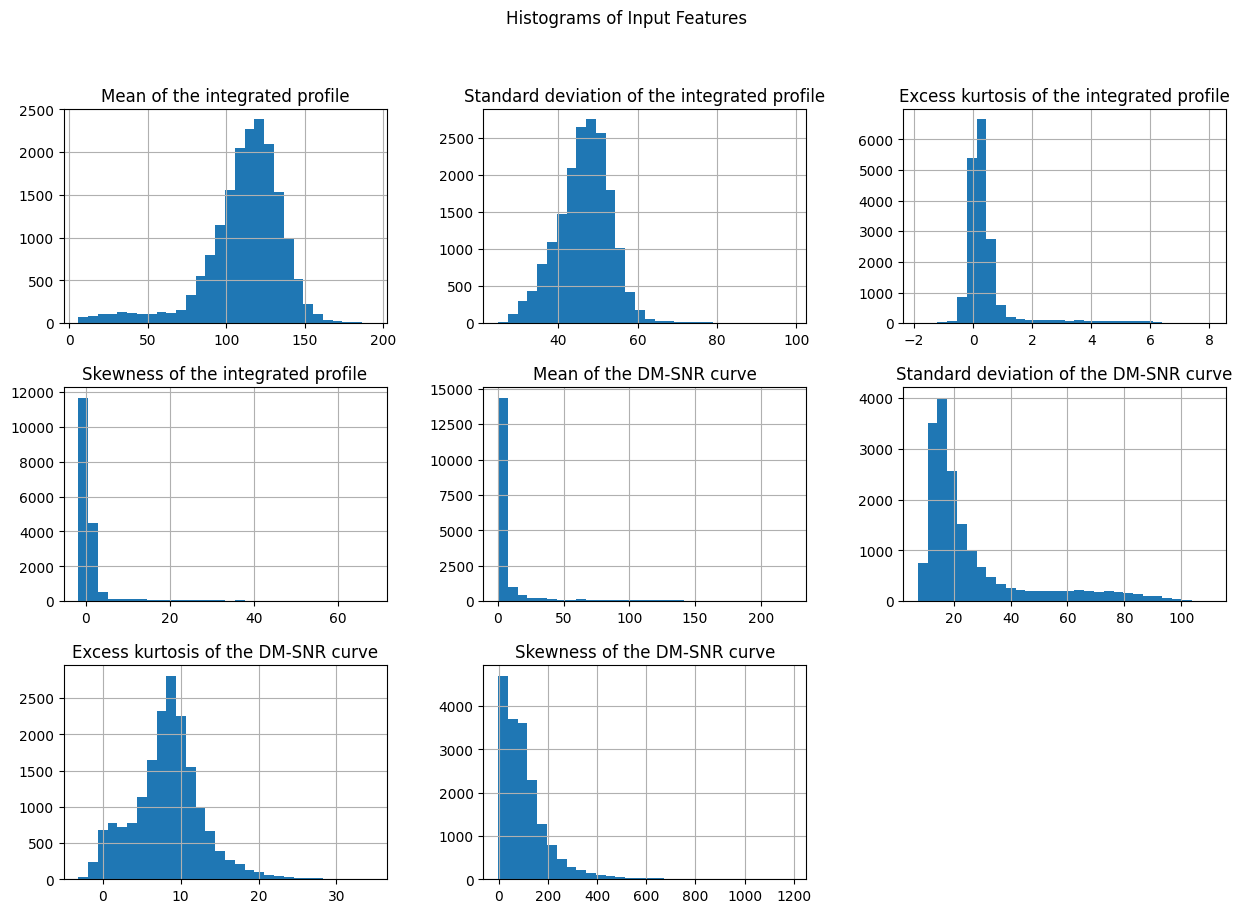

In [9]:
# H)Show distribution of each column
#----- Histograms for input features
input_features = data.columns[:-1]
data[input_features].hist(bins=30, figsize=(15, 10))
plt.suptitle("Histograms of Input Features")
plt.show()

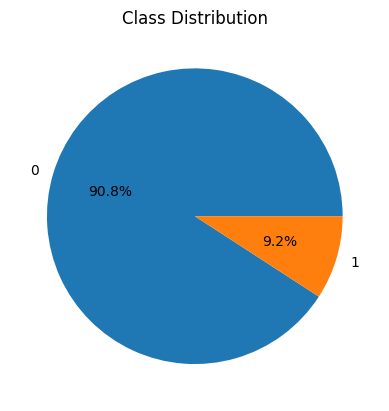

In [10]:
# I)Pie chart for 'class' column
class_counts = data['Class'].value_counts()
plt.pie(class_counts, labels=['0', '1'], autopct='%1.1f%%')
plt.title("Class Distribution")
plt.show()

In [11]:
# J)Unique values of the dtatset
data.nunique()


Mean of the integrated profile                   8626
Standard deviation of the integrated profile    17862
Excess kurtosis of the integrated profile       17897
Skewness of the integrated profile              17898
Mean of the DM-SNR curve                         9000
Standard deviation of the DM-SNR curve          17894
Excess kurtosis of the DM-SNR curve             17895
Skewness of the DM-SNR curve                    17895
Class                                               2
dtype: int64

In [12]:

# K) Normalize the data
X = (X - np.min(X, axis=0)) / (np.max(X, axis=0) - np.min(X, axis=0))


.....................................................................................  **PHASE 2** ................**L,M,N,O,P,Q**..............................................................................................

In [13]:
# PHASE 2

# L)NOW BUILD A MODEL WITH SINGLE LAYER AND SINGLE NEURON

# PART 1: Single layer, single neuron model
single_layer_model = Sequential()
single_layer_model.add(Dense(1, activation='sigmoid', input_dim=8))
single_layer_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# M)Train the data using Keras, TensorFlow
history_single_layer = single_layer_model.fit(X, y, epochs=200, batch_size=32, verbose=1)

# N)Print the accuracy
_, accuracy_single_layer = single_layer_model.evaluate(X, y, verbose=0)
print('Single Layer Model Accuracy: %.2f' % (accuracy_single_layer * 100))



Epoch 1/200
560/560 [==============================] - 2s 2ms/step - loss: 0.5056 - accuracy: 0.8699
Epoch 2/200
560/560 [==============================] - 1s 2ms/step - loss: 0.3154 - accuracy: 0.9084
Epoch 3/200
560/560 [==============================] - 1s 2ms/step - loss: 0.2529 - accuracy: 0.9084
Epoch 4/200
560/560 [==============================] - 1s 2ms/step - loss: 0.2181 - accuracy: 0.9139
Epoch 5/200
560/560 [==============================] - 1s 2ms/step - loss: 0.1938 - accuracy: 0.9276
Epoch 6/200
560/560 [==============================] - 1s 2ms/step - loss: 0.1759 - accuracy: 0.9384
Epoch 7/200
560/560 [==============================] - 1s 2ms/step - loss: 0.1623 - accuracy: 0.9444
Epoch 8/200
560/560 [==============================] - 1s 2ms/step - loss: 0.1518 - accuracy: 0.9484
Epoch 9/200
560/560 [==============================] - 1s 2ms/step - loss: 0.1435 - accuracy: 0.9521
Epoch 10/200
560/560 [==============================] - 1s 2ms/step - loss: 0.1368 - accura

In [14]:
# O)BUILD A MULTILAYER MODEL WITH MORE NEURONS
# PART 2: Multilayer model with more layers and more neurons
multi_layer_model = Sequential()
multi_layer_model.add(Dense(16, activation='relu', input_dim=8))
multi_layer_model.add(Dense(8, activation='relu'))
multi_layer_model.add(Dense(1, activation='sigmoid'))
multi_layer_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# P)Train the data using Keras, TensorFlow
history_multi_layer = multi_layer_model.fit(X, y, epochs=200, batch_size=32, verbose=1)

# Q)Print the accuracy
_, accuracy_multi_layer = multi_layer_model.evaluate(X, y, verbose=0)
print('Multilayer Model Accuracy: %.2f' % (accuracy_multi_layer * 100))

Epoch 1/200
560/560 [==============================] - 2s 2ms/step - loss: 0.2086 - accuracy: 0.9498
Epoch 2/200
560/560 [==============================] - 1s 2ms/step - loss: 0.0915 - accuracy: 0.9724
Epoch 3/200
560/560 [==============================] - 1s 2ms/step - loss: 0.0860 - accuracy: 0.9746
Epoch 4/200
560/560 [==============================] - 1s 2ms/step - loss: 0.0850 - accuracy: 0.9753
Epoch 5/200
560/560 [==============================] - 1s 2ms/step - loss: 0.0840 - accuracy: 0.9755
Epoch 6/200
560/560 [==============================] - 1s 3ms/step - loss: 0.0831 - accuracy: 0.9760
Epoch 7/200
560/560 [==============================] - 1s 3ms/step - loss: 0.0826 - accuracy: 0.9755
Epoch 8/200
560/560 [==============================] - 1s 2ms/step - loss: 0.0820 - accuracy: 0.9761
Epoch 9/200
560/560 [==============================] - 1s 2ms/step - loss: 0.0817 - accuracy: 0.9761
Epoch 10/200
560/560 [==============================] - 1s 2ms/step - loss: 0.0810 - accura

In [15]:
# O)BUILD A MULTILAYER MODEL WITH MORE  NEURONS THAN PREVIOUS PART 2
# PART 3: Multilayer model with more layers and more neurons
multi_layer_model = Sequential()
multi_layer_model.add(Dense(64, activation='relu', input_dim=8))
multi_layer_model.add(Dense(32, activation='relu'))
multi_layer_model.add(Dense(16, activation='relu'))
multi_layer_model.add(Dense(1, activation='sigmoid'))
multi_layer_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# P)Train the data using Keras, TensorFlow
history_multi_layer = multi_layer_model.fit(X, y, epochs=200, batch_size=32, verbose=1)

# Q)Print the accuracy
_, accuracy_multi_layer = multi_layer_model.evaluate(X, y, verbose=0)
print('Multilayer Model Accuracy: %.2f' % (accuracy_multi_layer * 100))



Epoch 1/200
560/560 [==============================] - 2s 2ms/step - loss: 0.1369 - accuracy: 0.9606
Epoch 2/200
560/560 [==============================] - 1s 2ms/step - loss: 0.0838 - accuracy: 0.9761
Epoch 3/200
560/560 [==============================] - 1s 2ms/step - loss: 0.0822 - accuracy: 0.9760
Epoch 4/200
560/560 [==============================] - 1s 2ms/step - loss: 0.0804 - accuracy: 0.9765
Epoch 5/200
560/560 [==============================] - 1s 2ms/step - loss: 0.0791 - accuracy: 0.9767
Epoch 6/200
560/560 [==============================] - 1s 2ms/step - loss: 0.0785 - accuracy: 0.9770
Epoch 7/200
560/560 [==============================] - 2s 3ms/step - loss: 0.0773 - accuracy: 0.9774
Epoch 8/200
560/560 [==============================] - 2s 3ms/step - loss: 0.0760 - accuracy: 0.9779
Epoch 9/200
560/560 [==============================] - 1s 2ms/step - loss: 0.0760 - accuracy: 0.9774
Epoch 10/200
560/560 [==============================] - 1s 2ms/step - loss: 0.0748 - accura

In [16]:
# O)BUILD A MULTILAYER MODEL WITH MORE  NEURONS THAN PREVIOUS PART 3
# PART 4: Multilayer model with more layers and more neurons

multi_layer_model = Sequential()
multi_layer_model.add(Dense(128, activation='relu', input_dim=8))
multi_layer_model.add(Dense(64, activation='relu'))
multi_layer_model.add(Dense(32, activation='relu'))
multi_layer_model.add(Dense(16, activation='relu'))
multi_layer_model.add(Dense(1, activation='sigmoid'))

multi_layer_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# P)Train the data using Keras, TensorFlow
history_multi_layer = multi_layer_model.fit(X, y, epochs=200, batch_size=32, verbose=1)

# Q)Print the accuracy
_, accuracy_multi_layer = multi_layer_model.evaluate(X, y, verbose=0)
print('Multilayer Model Accuracy: %.2f' % (accuracy_multi_layer * 100))




Epoch 1/200
560/560 [==============================] - 3s 2ms/step - loss: 0.1206 - accuracy: 0.9665
Epoch 2/200
560/560 [==============================] - 1s 2ms/step - loss: 0.0831 - accuracy: 0.9759
Epoch 3/200
560/560 [==============================] - 1s 2ms/step - loss: 0.0809 - accuracy: 0.9767
Epoch 4/200
560/560 [==============================] - 1s 2ms/step - loss: 0.0790 - accuracy: 0.9768
Epoch 5/200
560/560 [==============================] - 1s 2ms/step - loss: 0.0777 - accuracy: 0.9770
Epoch 6/200
560/560 [==============================] - 1s 2ms/step - loss: 0.0785 - accuracy: 0.9768
Epoch 7/200
560/560 [==============================] - 1s 2ms/step - loss: 0.0756 - accuracy: 0.9779
Epoch 8/200
560/560 [==============================] - 1s 2ms/step - loss: 0.0764 - accuracy: 0.9775
Epoch 9/200
560/560 [==============================] - 2s 3ms/step - loss: 0.0758 - accuracy: 0.9780
Epoch 10/200
560/560 [==============================] - 2s 3ms/step - loss: 0.0728 - accura

In [19]:
# O)BUILD A MULTILAYER MODEL WITH MORE  NEURONS THAN PREVIOUS PART 4
# PART 5: Multilayer model with more layers and more neurons

multi_layer_model = Sequential()
multi_layer_model.add(Dense(256, activation='relu', input_dim=8))
multi_layer_model.add(Dense(128, activation='relu'))
multi_layer_model.add(Dense(64, activation='relu'))
multi_layer_model.add(Dense(32, activation='relu'))
multi_layer_model.add(Dense(1, activation='sigmoid'))
multi_layer_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# P)Train the data using Keras, TensorFlow
history_multi_layer = multi_layer_model.fit(X, y, epochs=200, batch_size=32, verbose=1)

# Q)Print the accuracy
_, accuracy_multi_layer = multi_layer_model.evaluate(X, y, verbose=0)
print('Multilayer Model Accuracy: %.2f' % (accuracy_multi_layer * 100))




Epoch 1/200
560/560 [==============================] - 3s 3ms/step - loss: 0.1073 - accuracy: 0.9681
Epoch 2/200
560/560 [==============================] - 1s 3ms/step - loss: 0.0824 - accuracy: 0.9766
Epoch 3/200
560/560 [==============================] - 1s 3ms/step - loss: 0.0812 - accuracy: 0.9764
Epoch 4/200
560/560 [==============================] - 2s 3ms/step - loss: 0.0794 - accuracy: 0.9771
Epoch 5/200
560/560 [==============================] - 1s 3ms/step - loss: 0.0777 - accuracy: 0.9774
Epoch 6/200
560/560 [==============================] - 2s 4ms/step - loss: 0.0774 - accuracy: 0.9777
Epoch 7/200
560/560 [==============================] - 2s 3ms/step - loss: 0.0752 - accuracy: 0.9786
Epoch 8/200
560/560 [==============================] - 1s 3ms/step - loss: 0.0744 - accuracy: 0.9786
Epoch 9/200
560/560 [==============================] - 1s 3ms/step - loss: 0.0733 - accuracy: 0.9789
Epoch 10/200
560/560 [==============================] - 1s 3ms/step - loss: 0.0729 - accura

In [17]:
'''# O)BUILD A MULTILAYER MODEL WITH MORE  NEURONS THAN PREVIOUS PART 4 BUT WITH DROPOUT FEATURE ADDED
# PART 5: Multilayer model with more layers and more neurons

multi_layer_model = Sequential()
multi_layer_model.add(Dense(256, activation='relu', input_dim=8))
multi_layer_model.add(Dropout(0.5))
multi_layer_model.add(Dense(128, activation='relu'))
multi_layer_model.add(Dropout(0.5))
multi_layer_model.add(Dense(64, activation='relu'))
multi_layer_model.add(Dropout(0.5))
multi_layer_model.add(Dense(32, activation='relu'))
multi_layer_model.add(Dropout(0.5))
multi_layer_model.add(Dense(1, activation='sigmoid'))

multi_layer_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# P)Train the data using Keras, TensorFlow
history_multi_layer = multi_layer_model.fit(X, y, epochs=200, batch_size=32, verbose=1)

# Q)Print the accuracy
_, accuracy_multi_layer = multi_layer_model.evaluate(X, y, verbose=0)
print('Multilayer Model Accuracy: %.2f' % (accuracy_multi_layer * 100))'''




Epoch 1/200
560/560 [==============================] - 3s 3ms/step - loss: 0.1574 - accuracy: 0.9526
Epoch 2/200
560/560 [==============================] - 2s 3ms/step - loss: 0.1083 - accuracy: 0.9728
Epoch 3/200
560/560 [==============================] - 3s 4ms/step - loss: 0.1011 - accuracy: 0.9755
Epoch 4/200
560/560 [==============================] - 2s 4ms/step - loss: 0.1001 - accuracy: 0.9752
Epoch 5/200
560/560 [==============================] - 2s 3ms/step - loss: 0.0965 - accuracy: 0.9761
Epoch 6/200
560/560 [==============================] - 2s 3ms/step - loss: 0.0912 - accuracy: 0.9758
Epoch 7/200
560/560 [==============================] - 2s 3ms/step - loss: 0.0943 - accuracy: 0.9760
Epoch 8/200
560/560 [==============================] - 2s 3ms/step - loss: 0.0904 - accuracy: 0.9765
Epoch 9/200
560/560 [==============================] - 2s 3ms/step - loss: 0.0924 - accuracy: 0.9749
Epoch 10/200
560/560 [==============================] - 3s 5ms/step - loss: 0.0927 - accura

..................................................................................................  **PHASE 3**  ...........................................................................................................................

In [20]:
# PHASE 3


# R) Shuffle data
shuffled_indices = np.random.permutation(len(X))
X_shuffled = X[shuffled_indices]
y_shuffled = y[shuffled_indices]

In [21]:
# S) Split data, test, and validation
split_ratio = 0.8
split_index = int(len(X) * split_ratio)
X_train, X_val = X_shuffled[:split_index], X_shuffled[split_index:]
y_train, y_val = y_shuffled[:split_index], y_shuffled[split_index:]

In [ ]:
# T) Plotting, graphs, visualization
# Train model with checkpointing
# Use multi_layer_model instead of model
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_accuracy', mode='max')
history = multi_layer_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=200, batch_size=32, callbacks=[checkpoint])


Epoch 1/200
448/448 [==============================] - 2s 5ms/step - loss: 0.0581 - accuracy: 0.9834 - val_loss: 0.0472 - val_accuracy: 0.9872
Epoch 2/200
448/448 [==============================] - 1s 3ms/step - loss: 0.0566 - accuracy: 0.9843 - val_loss: 0.0552 - val_accuracy: 0.9852
Epoch 3/200
448/448 [==============================] - 1s 3ms/step - loss: 0.0568 - accuracy: 0.9834 - val_loss: 0.0484 - val_accuracy: 0.9866
Epoch 4/200
448/448 [==============================] - 1s 3ms/step - loss: 0.0554 - accuracy: 0.9846 - val_loss: 0.0496 - val_accuracy: 0.9869
Epoch 5/200
448/448 [==============================] - 2s 5ms/step - loss: 0.0557 - accuracy: 0.9840 - val_loss: 0.0505 - val_accuracy: 0.9866
Epoch 6/200
142/448 [========>.....................] - ETA: 1s - loss: 0.0593 - accuracy: 0.9835

In [ ]:
# U)Plot accuracy and loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:








# V) Gradually grow model (Not necessary as this example model achieves good accuracy)

# W) Print accuracy and loss on both training and validation dataset
_, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
_, val_accuracy = model.evaluate(X_val, y_val, verbose=0)
print('Training Accuracy: %.2f' % (train_accuracy * 100))
print('Validation Accuracy: %.2f' % (val_accuracy * 100))

# X) Print recall, precision, F1-score
y_val_pred = (model.predict(X_val) > 0.5).astype(int).flatten()

true_positive = np.sum((y_val_pred == 1) & (y_val == 1))
false_positive = np.sum((y_val_pred == 1) & (y_val == 0))
false_negative = np.sum((y_val_pred == 0) & (y_val == 1))

recall = true_positive / (true_positive + false_negative)
precision = true_positive / (true_positive + false_positive)
f1_score = 2 * precision * recall / (precision + recall)

print('Recall: %.2f' % recall)
print('Precision: %.2f' % precision)
print('F1 Score: %.2f' % f1_score)


In [ ]:

# PHASE 4
# N) Feature importance and model comparison
num_features = X.shape[1]
val_accuracies = []

for i in range(num_features):
    single_feature_model = Sequential()
    single_feature_model.add(Dense(2, activation='relu', input_dim=1))
    single_feature_model.add(Dense(1, activation='sigmoid'))
    single_feature_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    X_train_single = X_train[:, i].reshape(-1, 1)
    X_val_single = X_val[:, i].reshape(-1, 1)
    single_feature_model.fit(X_train_single, y_train, epochs=10, batch_size=32, verbose=1)
    
    _, single_feature_val_accuracy = single_feature_model.evaluate(X_val_single, y_val, verbose=1)
    val_accuracies.append(single_feature_val_accuracy)

# Plot validation accuracies
plt.bar(range(num_features), val_accuracies)
plt.xlabel('Feature Index')
plt.ylabel('Validation Accuracy')
plt.ylim(0.8, 1)
plt.title('Feature Importance')
plt.show()

# Remove unimportant features and compare
sorted_indices = np.argsort(val_accuracies)
val_accuracies_reduced_features = []

for i in range(num_features):
    reduced_features_indices = sorted_indices[:i]
    X_train_reduced = X_train[:, reduced_features_indices]
    X_val_reduced = X_val[:, reduced_features_indices]

    reduced_features_model = Sequential()
    reduced_features_model.add(Dense(2, activation='relu', input_dim=i))
    reduced_features_model.add(Dense(1, activation='sigmoid'))
    reduced_features_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    reduced_features_model.fit(X_train_reduced, y_train, epochs=10, batch_size=32, verbose=1)
    
    _, reduced_features_val_accuracy = reduced_features_model.evaluate(X_val_reduced, y_val, verbose=1)
    val_accuracies_reduced_features.append(reduced_features_val_accuracy)

# Plot validation accuracies
plt.plot(val_accuracies_reduced_features)
plt.xlabel('Number of Removed Features')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy vs. Removed Features')
plt.show()

